In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
FILE_LOCATION_PATH = './python Datasets/data.csv'
EmpData = pd.read_csv(FILE_LOCATION_PATH)
X = EmpData['YearsExperience']
Y = EmpData['Salary']

In [186]:
#TO AVOID BIAS, LET'S RANDOMIZE THE DATA (SO THAT WE COULD SELECT RANDOM SAMPLES)
np.random.shuffle(np.array(X))
np.random.shuffle(np.array(Y))

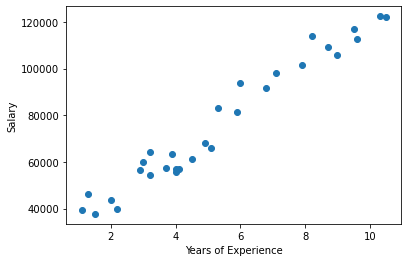

In [187]:
plt.scatter(X, Y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [188]:
# X.size * .66 (66 % of Data for training ) = 19.8 ~ 20 (from 30)
Train_X, Train_Y = X[:20], Y[:20]  # 66% of Total for Training
Test_X, Test_Y = X[20:], Y[20:]    # 33% of Total for Testing

======================================================================

1) Linear Regression Analysis using Numpy polyfit and poly1d functions

======================================================================

In [189]:
#TRAINING A MODEL USING NUMPY 
deg=1
pn =np.poly1d(np.polyfit(Train_X, Train_Y, deg=deg))

In [190]:
xp = np.linspace(0, 11)
plt.scatter(Train_X, Train_Y)
plt.plot(xp, pn(xp), color='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [191]:
def predict(xn):
    return pn(xn)

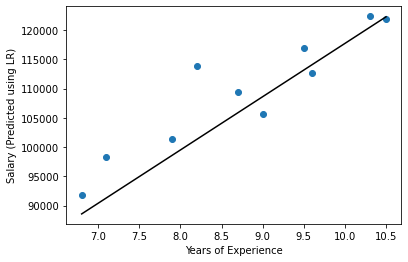

In [192]:
Predict_Y = predict(Test_X)
plt.scatter(Test_X, Test_Y)
plt.plot(Test_X, Predict_Y, 'k')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (Predicted using LR)')
deviation = Test_Y - Predict_Y
plt.show()

In [193]:
np.corrcoef(Train_X, Train_Y)

array([[1.        , 0.90754379],
       [0.90754379, 1.        ]])

In [194]:
np.corrcoef(Test_X, Test_Y)

array([[1.       , 0.9243559],
       [0.9243559, 1.       ]])

In [196]:
np.corrcoef(Test_X, Predict_Y)

array([[1., 1.],
       [1., 1.]])

=========================================================
                
                Now using sklearn library
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

=========================================================

In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
linreg_model = LinearRegression()

In [199]:
#RESHAPING/TRANSFORMING DATA FEED FOR COMPATIBILITY (SKLEARN ACCEPTABLE FORMAT)
x_train =np.array(Train_X).reshape(-1, 1)
y_train = np.array(Train_Y).reshape(-1, 1)
x_test = np.array(Test_X).reshape(-1,1)
y_test = np.array(Test_Y).reshape(-1, 1)

Now, train the Model using train_x, train_y (equivalent random samples of Years of Experience and Salalry)

In [200]:
linreg_model.fit(x_train, y_train)

LinearRegression()

Y Intercept (Bias | Salary value)

In [201]:
linreg_model.intercept_

array([26577.40001951])

Correlation coefficient score

This score will help us to see if our fit is best or worst fit. any value close to 1 means best and positive fit(positively correlated). 0 means NO Correlation between Salary and Years of Experience.  if close to -1, salary and years of experience are negatively correlated

In [208]:
linreg_model.score(x_train, y_train)

0.8236357371791213

The Slope of the curve i.e, in y = mx+c 
coef_ computes m value. i.e, Change in Salary per Years of Experience

In [203]:
linreg_model.coef_

array([[9116.11420069]])

Time to Predict and see the performance of fit

In [204]:
#Here based on Basic assumption (Linear Regression) that Y (or Salary) is dependent variable on X (or Years of Experience)
# y = mx + c (c intercept, m being slope of line), y is linearly dependent on x
linreg_model.predict(x_test)

array([[ 88566.97658422],
       [ 91301.81084443],
       [ 98594.70220499],
       [101329.53646519],
       [105887.59356554],
       [108622.42782575],
       [113180.48492609],
       [114092.09634616],
       [120473.37628665],
       [122296.59912679]])

Now, Let's construct a Linear relation between Years of Experience(X) and Salary(y)
Y = m * X + C 

m being slope i.e, coef, and C is intercept_

so, equation turns out to be

Y = linreg_model.coef_  * X  + linreg_model.intercept_

In [205]:
#Now using the above linear equeation, we can construct a Predict function as given below
def Predict(x):
    return np.multiply(linreg_model.coef_[0], x) + linreg_model.intercept_[0]

y_predict = Predict(test_x)
y_predict

array([[ 88566.97658422],
       [ 91301.81084443],
       [ 98594.70220499],
       [101329.53646519],
       [105887.59356554],
       [108622.42782575],
       [113180.48492609],
       [114092.09634616],
       [120473.37628665],
       [122296.59912679]])

Deviation in Predicted Value and Actual Salary(y_test) is predicted salary - actual salary(from test sample salary)

In [206]:
deviation_in_salary = linreg_model.predict(x_test) - y_test
deviation_in_salary 

array([[ -3171.02341578],
       [ -6971.18915557],
       [ -2707.29779501],
       [-12482.46353481],
       [ -3543.40643446],
       [  3040.42782575],
       [ -3788.51507391],
       [  1457.09634616],
       [ -1917.62371335],
       [   424.59912679]])

now to analyse whether the fit worked properly or not, we use correlation coefficient (rsquare)

In [207]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7154263893579014

Now Visualization

In [217]:
#TRAIN DATA VISUALIZATION
plt.scatter(x_train, y_train)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Train Data visualization')

Text(0.5, 1.0, 'Train Data visualization')

In [218]:
#TEST DATA VISUALIZATION
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, color='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Test Data visualization')

Text(0.5, 1.0, 'Test Data visualization')